In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('C:/Users/saisuneeth/Downloads/Suneeth/projects/Forecasting Product Sales/perrin-freres-monthly-champagne-.csv')

In [123]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [124]:
df.sample(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
90,1971-07,4633.0
66,1969-07,3523.0
106,Perrin Freres monthly champagne sales millions...,NaN
59,1968-12,11331.0
41,1967-06,4539.0


In [125]:
df.shape

(107, 2)

In [126]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [127]:
# checking whether Month column has any incorrect values
date = pd.to_datetime(df.Month, errors='coerce')
date.isna().sum()

2

In [128]:
df['Month'] = pd.to_datetime(df.Month, errors='coerce')

In [129]:
df.dropna(inplace=True)
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [130]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [131]:
# setting Month as index as it is time series

In [132]:
df.set_index('Month', inplace = True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [133]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [134]:
#checking stationary or not

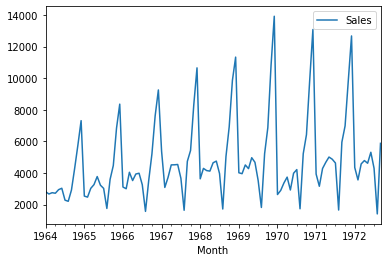

In [135]:
df.plot()

In [136]:
# plot shows data is has seasonality

In [137]:
#checking using Augmented Dickey–Fuller test to see whether data is stationary or not
# hypothesis testing
# Ho(NULL) data is not stationary
# H1(alt. hypo) data is stationary

In [138]:
from statsmodels.tsa.stattools import adfuller

In [139]:
adfuller(df.Sales)

(-1.8335930563276217,
 0.3639157716602457,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [140]:
# p-value = 0.36 which tells us p is not less than 0.05 so rejecting null hypothesis
# final outcome data is not stationary

In [141]:
# converting data to stationary by using differencing

In [142]:
df['Sales first diff.']= df['Sales'] - df['Sales'].shift(1)
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [143]:
df['Seasonal first diff.']= df['Sales'] - df['Sales'].shift(12)
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [144]:
adfuller(df['Seasonal first diff.'].dropna())

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [145]:
# now we can see p value less than 0.05, we have evidence to accept null hypothesis and concluding data is stationary

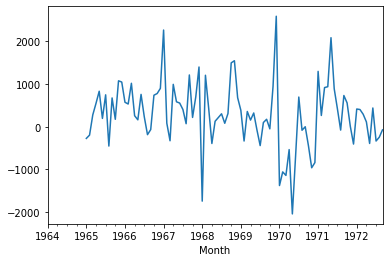

In [146]:
df['Seasonal first diff.'].plot()

In [ ]:
# ARIMA - AR + I + MA
# p,d,q
# p = pacf
# d = 1
# q = acf

In [149]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

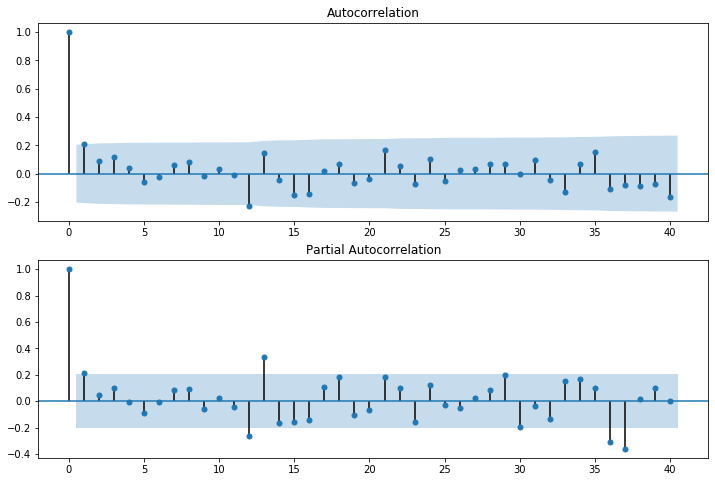

In [153]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:],lags = 40,ax=ax1) # choosing from 13th row coz NAN values
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:],lags = 40, ax=ax2)

In [ ]:
# from this graph we can see pacf shows q values =1 and acf shows p = 1

In [154]:
from statsmodels.tsa.arima_model import ARIMA

In [155]:
model = ARIMA(df.Sales, order = [1,1,1])

C:\Users\saisuneeth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saisuneeth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [157]:
ts_model = model.fit()

In [158]:
ts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 30 Mar 2021   AIC                           1910.251
Time:                        21:23:18   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7834     12.405      1.837      0.066      -1.530      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [161]:
df['forecast'] = ts_model.predict(start=90, end = 103, dynamic = True)

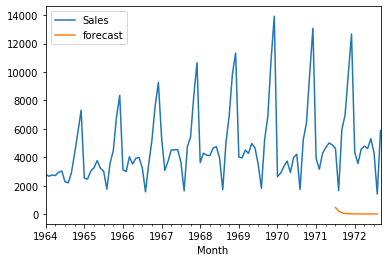

In [164]:
df[['Sales','forecast']].plot()

In [ ]:
# the predicted forecast is not as expected, this is due to seasonal data so we are going to use SARIMAX

In [169]:
import statsmodels.api as sm

In [175]:
SARIMAX_model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1), seasonal_order=(1,1,1,12)) # shift value = 12 as we used to differntiate seasonal data for 12 months

C:\Users\saisuneeth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\saisuneeth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [176]:
SARIMAX = SARIMAX_model.fit() 

In [177]:
df['SARIMAX_forecast'] = SARIMAX.predict(start = 90, end = 103, dynamic = True)

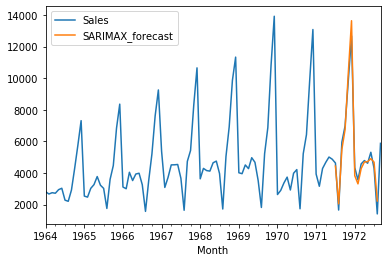

In [178]:
df[['Sales', 'SARIMAX_forecast']].plot()

In [ ]:
# creating additional dataset and predicting future

In [179]:
# using dateoff set for adding 24 months data
from pandas.tseries.offsets import DateOffset

In [181]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [183]:
future_dates = [df.index[-1]+ DateOffset(months = x) for x in range (0,24)]

In [184]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [190]:
future_dataset = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [192]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,SARIMAX_forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [194]:
 future_df = pd.concat([df,future_dataset])

In [195]:
future_df.shape

(128, 5)

In [198]:
future_df['forecast_SARIMAX2'] = SARIMAX.predict(start = 104, end = 124, dynamic = True)

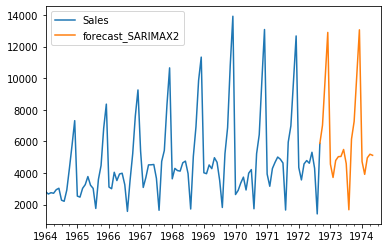

In [199]:
future_df[['Sales','forecast_SARIMAX2']].plot()